In [1]:
#first we will import our inline matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import psycopg2

In [3]:
# then we will import our pandas
import pandas as pd

### In this Notebook We will focus on state vs state and see if there are some who perform better than other.

In [6]:
state_data = pd.read_csv("Mortgage_merged_db.csv")

In [7]:
state_data

,loan_identifier,origination_channel,seller_name,original_interest_rate,original_upb,original_loan_term,origination_date,first_payment_date,original_ltv,original_cltv,...,monthly_reporting_period,current_interest_rate,loan_age,remaining_months_to_legal_maturity,adj_remaining_months_to_maturity,maturity_date,msa,current_loan_delinquency_status,modification_flag,delinquency
0,100000913397,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",6,324000,360,2018-09-01,2018-11-01,80,80,...,2019-12-01,5.88,14.0,346.0,346.0,2048-10-01,40140.0,0,N,False
1,100017539727,B,OTHER,5,307000,360,2018-12-01,2019-02-01,90,90,...,2019-12-01,4.75,11.0,349.0,349.0,2049-01-01,26420.0,0,N,False
2,100018053040,R,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5,256000,360,2018-11-01,2019-01-01,90,90,...,2019-12-01,4.88,12.0,348.0,348.0,2048-12-01,0.0,0,N,False
3,100019764317,C,"WELLS FARGO BANK, N.A.",5,248000,360,2018-12-01,2019-02-01,90,90,...,2019-10-01,4.88,9.0,351.0,0.0,2049-01-01,16980.0,X,N,True
4,100019765730,B,"UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITE...",4,490000,360,2019-03-01,2019-05-01,67,67,...,2019-12-01,4.25,8.0,352.0,352.0,2049-04-01,41860.0,0,N,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297447,999977469387,C,PENNYMAC CORP.,5,250000,360,2018-12-01,2019-02-01,80,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297448,999978067692,B,"UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITE...",5,123000,360,2018-12-01,2019-02-01,95,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297449,999983023544,R,OTHER,5,280000,240,2018-12-01,2019-02-01,69,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297450,999984004377,R,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5,155000,360,2019-01-01,2019-03-01,97,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# isolate just the state names and delinquency columns
state_results = state_data[['property_state','delinquency']]

In [10]:
# lets drop all NA values to use a clean df
state_results= state_results.dropna()

### First We Look at our whole data set and visualize how common is delinquncy within our data

In [11]:
state_results.delinquency.value_counts(normalize=True)

False    0.785571
True     0.214429
Name: delinquency, dtype: float64

#### 21.4% of all Mortgages end up in a Delinquent status according to our data set.


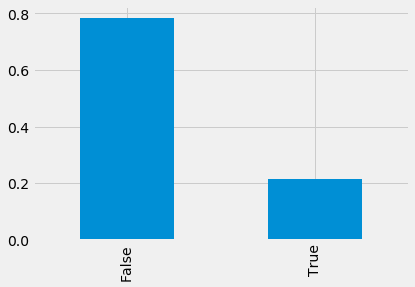

In [12]:
#lets visualize our results
state_results.delinquency.value_counts(normalize=True).plot(kind="bar")

### We will turn our attention to State vs State to see if there are any good players vs bad players in the market

In [16]:
# group by property state and turn it into a dataframe
state_vs = state_results.delinquency.groupby(state_results['property_state']).value_counts()
statevs_df = pd.DataFrame(state_vs)
statevs_df

delinquency
property_state delinquency             
AK             False                119
               True                  17
AL             False                928
               True                 185
AR             False                500
...                                 ...
WI             True                 432
WV             False                177
               True                  26
WY             False                140
               True                  34

[107 rows x 1 columns]

In [17]:
#Lets change the boolean values into percentage by using a lambda function

state_pcts = statevs_df.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
pd.set_option('display.max_rows', None)
state_pcts

delinquency
property_state delinquency             
AK             False          87.500000
               True           12.500000
AL             False          83.378257
               True           16.621743
AR             False          86.206897
               True           13.793103
AZ             False          73.586769
               True           26.413231
CA             False          67.700758
               True           32.299242
CO             False          68.732394
               True           31.267606
CT             False          85.518814
               True           14.481186
DC             False          75.396825
               True           24.603175
DE             False          78.835979
               True           21.164021
FL             False          86.551766
               True           13.448234
GA             False          83.358594
               True           16.641406
GU             False         100.000000
HI             False          78.149100
               True           21.850900
IA             False          78.813559
               True           21.186441
ID             False          75.562372
               True           24.437628
IL             False          74.953959
               True           25.046041
IN             False          80.392157
               True           19.607843
KS             False          79.266055
               True           20.733945
KY             False          76.809816
               True           23.190184
LA             False          82.958199
               True           17.041801
MA             False          69.477912
               True           30.522088
MD             False          77.255331
               True           22.744669
ME             False          79.365079
               True           20.634921
MI             False          77.206349
               True           22.793651
MN             False          78.370787
               True           21.629213
MO             False          76.222597
               True           23.777403
MS             False          82.340426
               True           17.659574
MT             False          81.122449
               True           18.877551
NC             False          81.757169
               True           18.242831
ND             False          81.538462
               True           18.461538
NE             False          78.877400
               True           21.122600
NH             False          74.599542
               True           25.400458
NJ             False          77.742448
               True           22.257552
NM             False          87.719298
               True           12.280702
NV             False          78.840285
               True           21.159715
NY             False          87.655127
               True           12.344873
OH             False          85.007386
               True           14.992614
OK             False          88.308116
               True           11.691884
OR             False          77.052023
               True           22.947977
PA             False          81.702128
               True           18.297872
PR             False          96.026490
               True            3.973510
RI             False          80.063291
               True           19.936709
SC             False          82.804385
               True           17.195615
SD             False          76.284585
               True           23.715415
TN             False          82.714215
               True           17.285785
TX             False          87.380952
               True           12.619048
UT             False          67.955508
               True           32.044492
VA             False          78.920954
               True           21.079046
VI             False          80.000000
               True           20.000000
VT             False          89.189189
               True         

In [18]:
# there are two coumns with the same name. lets adjust that
state_pcts.rename(columns={'delinquency' : 'Percentage'}, inplace=True)
state_pcts

Percentage
property_state delinquency            
AK             False         87.500000
               True          12.500000
AL             False         83.378257
               True          16.621743
AR             False         86.206897
               True          13.793103
AZ             False         73.586769
               True          26.413231
CA             False         67.700758
               True          32.299242
CO             False         68.732394
               True          31.267606
CT             False         85.518814
               True          14.481186
DC             False         75.396825
               True          24.603175
DE             False         78.835979
               True          21.164021
FL             False         86.551766
               True          13.448234
GA             False         83.358594
               True          16.641406
GU             False        100.000000
HI             False         78.149100
               True          21.850900
IA             False         78.813559
               True          21.186441
ID             False         75.562372
               True          24.437628
IL             False         74.953959
               True          25.046041
IN             False         80.392157
               True          19.607843
KS             False         79.266055
               True          20.733945
KY             False         76.809816
               True          23.190184
LA             False         82.958199
               True          17.041801
MA             False         69.477912
               True          30.522088
MD             False         77.255331
               True          22.744669
ME             False         79.365079
               True          20.634921
MI             False         77.206349
               True          22.793651
MN             False         78.370787
               True          21.629213
MO             False         76.222597
               True          23.777403
MS             False         82.340426
               True          17.659574
MT             False         81.122449
               True          18.877551
NC             False         81.757169
               True          18.242831
ND             False         81.538462
               True          18.461538
NE             False         78.877400
               True          21.122600
NH             False         74.599542
               True          25.400458
NJ             False         77.742448
               True          22.257552
NM             False         87.719298
               True          12.280702
NV             False         78.840285
               True          21.159715
NY             False         87.655127
               True          12.344873
OH             False         85.007386
               True          14.992614
OK             False         88.308116
               True          11.691884
OR             False         77.052023
               True          22.947977
PA             False         81.702128
               True          18.297872
PR             False         96.026490
               True           3.973510
RI             False         80.063291
               True          19.936709
SC             False         82.804385
               True          17.195615
SD             False         76.284585
               True          23.715415
TN             False         82.714215
               True          17.285785
TX             False         87.380952
               True          12.619048
UT             False         67.955508
               True          32.044492
VA             False         78.920954
               True          21.079046
VI             False         80.000000
               True          20.000000
VT             False         89.189189
               True          10.810811
WA             False         75.057013
               True          24.942987
WI         

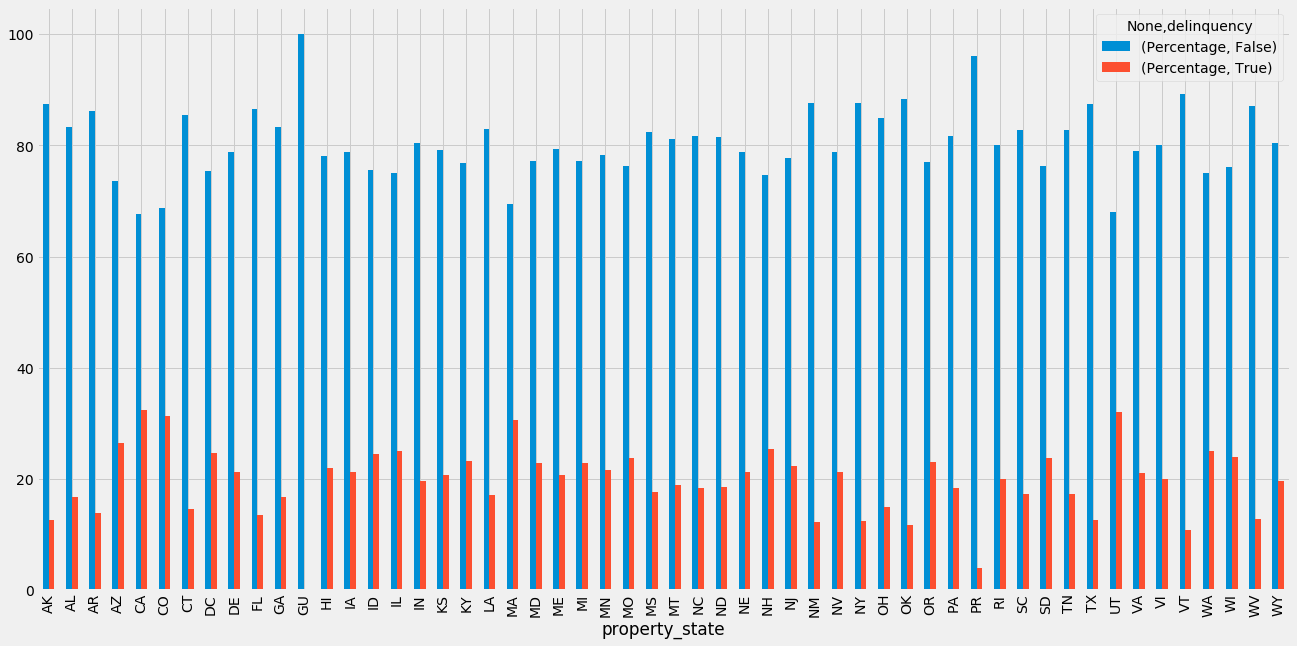

In [19]:
df = state_pcts.reset_index()
state_pcts.unstack().plot(kind='bar', figsize = (20,10))

#### The Territoy of GUAM have absolutely no cases of delinquency in 2019, rest of the states and territories range between 15% to 30%